In [1]:
import import_ipynb
import Helper as lib
import operator
import numpy as np

importing Jupyter notebook from Helper.ipynb


In [2]:
# First get the description data
desc_data = lib.GetDescriptionData()

In [3]:
# Then collect tag data
tag_data = lib.GetTagData()

In [14]:
# Collect all features
train_feature_data = np.array(lib.GetFeaturesFileData('data/features_train/features_resnet1000_train.csv'))
test_feature_data = np.array(lib.GetFeaturesFileData('data/features_test/features_resnet1000_test.csv'))
print(len(train_feature_data))

10000


In [5]:
print(train_feature_data[0][1:1001])

['-0.8994496464729309' '-0.9304700493812561' '-2.5033650398254395'
 '-3.1724987030029297' '-2.8191332817077637' '0.9921585917472839'
 '-3.6988630294799805' '0.6199913620948792' '0.9561479091644287'
 '-0.2186994105577469' '0.5958172082901001' '-3.1229825019836426'
 '-2.5487494468688965' '-2.3847455978393555' '-3.594316005706787'
 '-2.3238251209259033' '-0.7482914924621582' '-3.211718797683716'
 '-3.0199339389801025' '-2.9046552181243896' '-0.4094196557998657'
 '-1.793142557144165' '-2.764791250228882' '-2.1501145362854004'
 '-2.2583303451538086' '-1.528522253036499' '0.3937942385673523'
 '-0.9722171425819397' '-1.7514387369155884' '-0.9441556334495544'
 '-1.5331079959869385' '-2.1861319541931152' '-0.7379881143569946'
 '-2.087157726287842' '-2.9884073734283447' '0.5163060426712036'
 '1.0606229305267334' '-0.4704169034957886' '0.8655609488487244'
 '-0.7380955219268799' '-1.872955560684204' '0.899095356464386'
 '-2.969977378845215' '-0.26610067486763' '0.16756798326969147'
 '-1.0325826406

In [6]:
# Remove the extra image file name on the front
feature_data = []
for i in range(len(desc_data[0])):
    new_vector = train_feature_data[i][1:1001]
    new_vector = [float(i) for i in new_vector]
    feature_data.append(new_vector)
feature_data = np.array(feature_data)

In [7]:
print(feature_data.shape)

(10000, 1000)


In [8]:
# Convert tags into a list of individual labels
tag_label_data = []
full_feature_data = []
for i in range(len(tag_data[0])):
    for word in tag_data[0][i]:
        tag_label_data.append(word[1])
        full_feature_data.append(feature_data[i])

tag_label_data = np.array(tag_label_data)
full_feature_data = np.array(full_feature_data)
print(len(full_feature_data))
print(len(tag_data[0]))
print(len(tag_label_data))
print(tag_label_data[0])

28531
10000
28531
airplane


In [ ]:
# Train model to predict tag from feature data
from sklearn.linear_model import LogisticRegression
print(feature_data.shape)
print(tag_label_data[2])
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(full_feature_data, tag_label_data)

['person']
Image 100



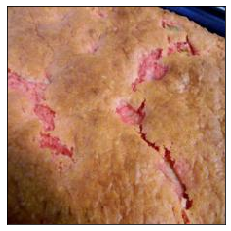

In [10]:
# Try predicting with logistic regression model
target_index = 100
target = full_feature_data[target_index].reshape(1,-1)
print(clf.predict(target))
lib.DisplayImage(target_index, 'train')

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0).fit(full_feature_data)

In [40]:
# Helper function that retrieves the most popular tags given a cluster values
# Input feature data should have labels
from scipy.spatial.distance import euclidean
def ClosestTwentyImages(cluster = [], data = []):
    computed_distances = []
    for i in range(len(data)):
        a = np.array(data[i][1:1001], dtype=float)
        b = np.array(cluster, dtype=float)
        distance = np.linalg.norm(a - b)
        computed_distances.append([i, distance])
    # Sort by first index
    computed_distances.sort(key=lambda x: x[1])
    computed_distances = computed_distances[:20]
    computed_distances = list(reversed(computed_distances))
    ret_list = []
    for entry in computed_distances:
        ret_list.append(entry[0])
    print(ret_list)
    return ret_list
    

Correct image:
Image 50



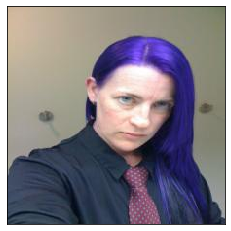

[986, 2906, 4343, 808, 4124, 192, 8049, 612, 1072, 7584, 9743, 8924, 2853, 7955, 1835, 8217, 15, 3053, 7830, 6850]
Guess is not in closest
Image 986



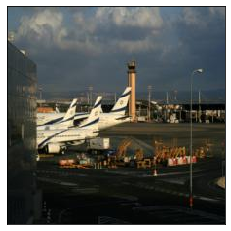

Image 2906



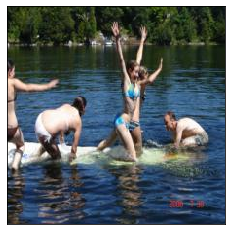

Image 4343



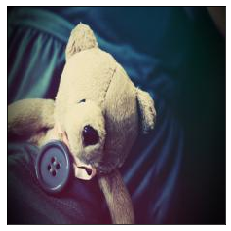

Image 808



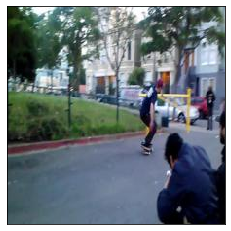

Image 4124



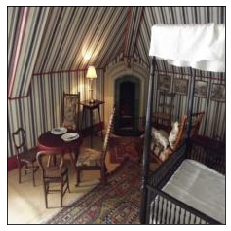

Image 192



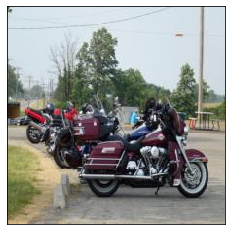

Image 8049



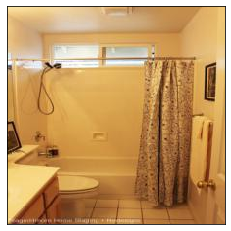

Image 612



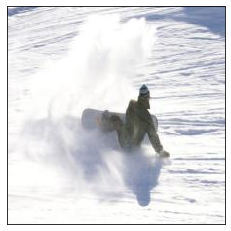

Image 1072



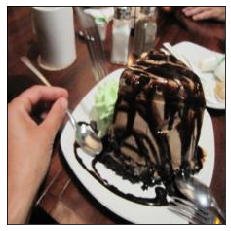

Image 7584



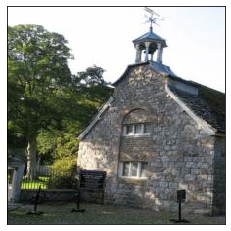

Image 9743



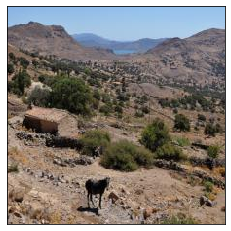

Image 8924



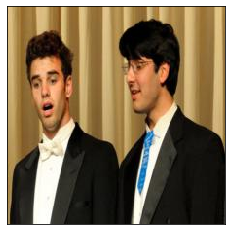

Image 2853



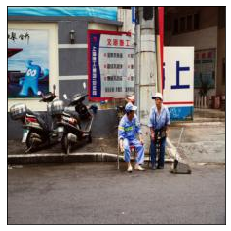

Image 7955



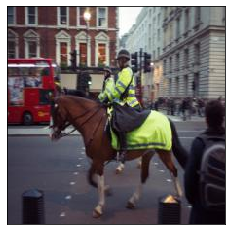

Image 1835



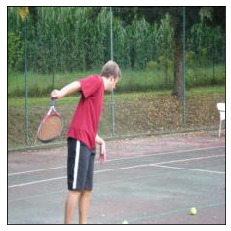

Image 8217



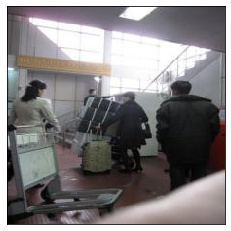

Image 15



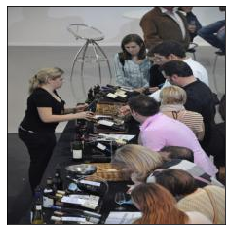

Image 3053



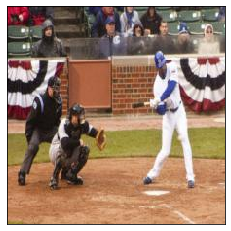

Image 7830



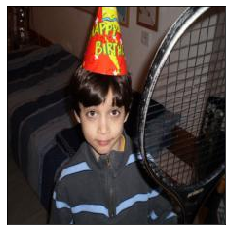

Image 6850



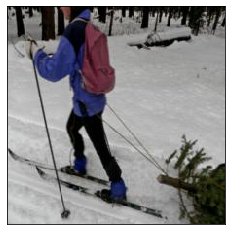

In [42]:
# Try predicting with kmeans model
target_index = 50
target = full_feature_data[target_index].reshape(1,-1)
guess = kmeans.predict(target)
print('Correct image:')
lib.DisplayImage(target_index, 'train')
closest = ClosestTwentyImages(kmeans.cluster_centers_[guess][0], train_feature_data)
if target_index in closest:
    print('Guess is in closest')
else:
    print('Guess is not in closest')
lib.DisplayImages(closest, 'train')